Name: Qiaochu Dai

Githubname: Levi519519

USCID: 7326115044

1. Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.1

(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

Text(0.5, 0.98, 'Scatter Plot of independent variables')

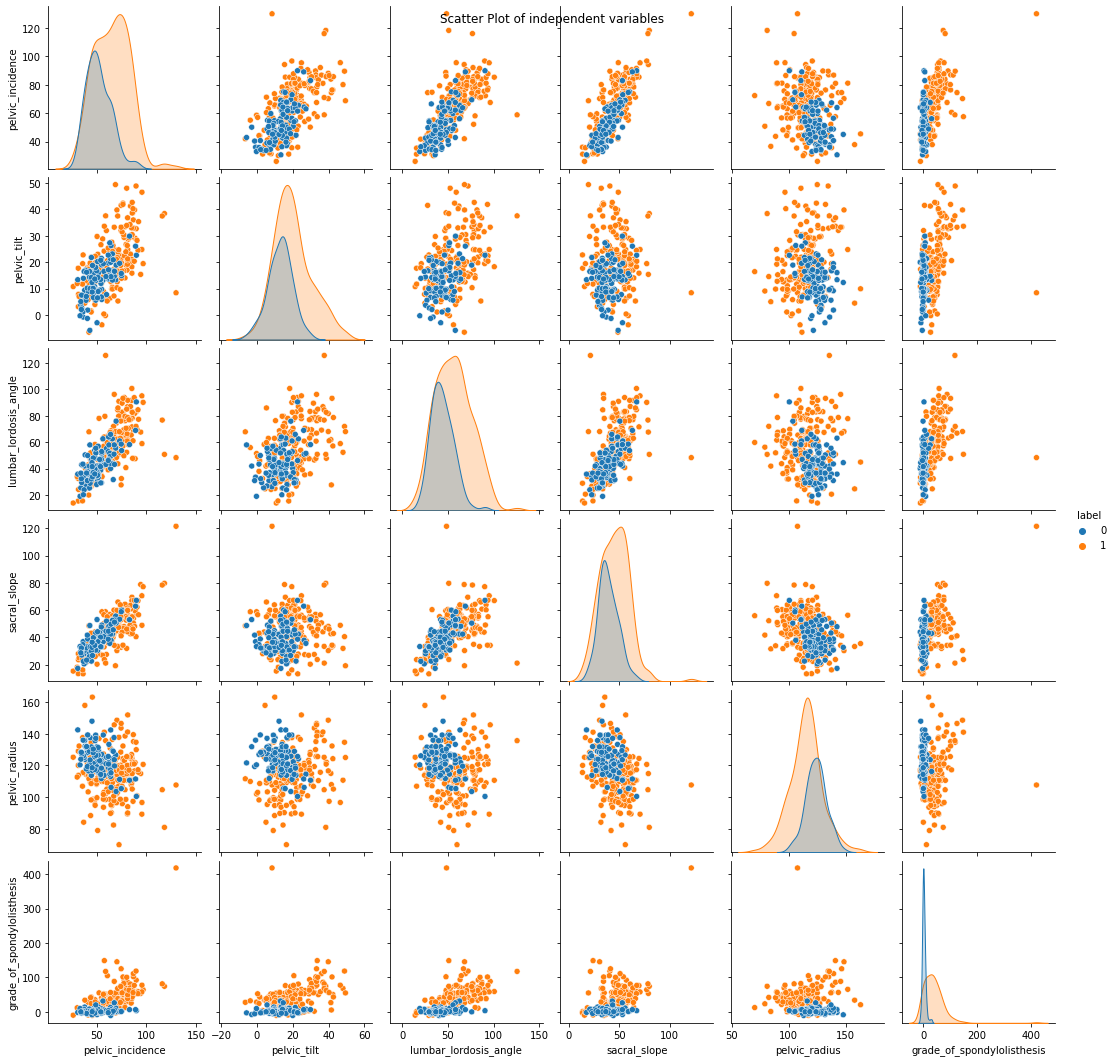

In [167]:
NAMES = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "label"]

PATH = '../../data/vertebral_column_data/column_2C.dat'

df = pd.read_csv(PATH, header=None,delimiter=" ",names=NAMES)
df.label.replace(['AB', 'NO'], [1, 0], inplace=True)

scatterplot = sns.pairplot(data = df, hue = "label")
scatterplot.fig.suptitle("Scatter Plot of independent variables")

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

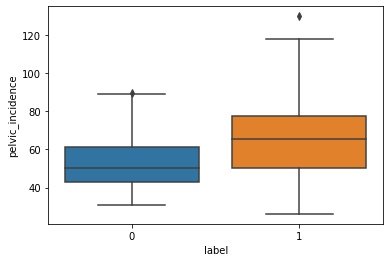

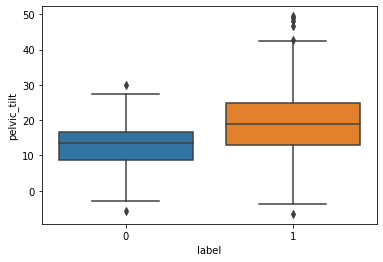

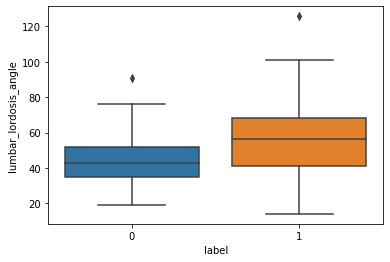

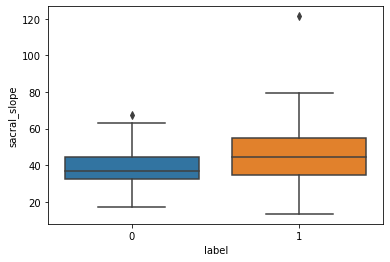

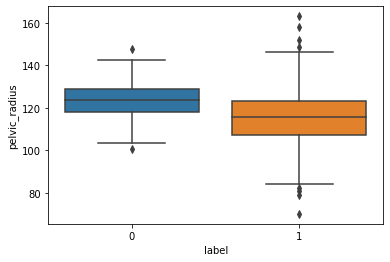

In [168]:
for i in range(0, 5):
    sns.boxplot(data=df,x=df['label'], y=df.columns[i])
    plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [169]:
cl_0=df.loc[df['label'] ==0]
cl_1=df.loc[df['label'] ==1]
df_train = pd.concat([cl_0.head(70), cl_1.head(140)])
df_test = pd.concat([cl_0.iloc[70:,:], cl_1.iloc[140:,:]])
df_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [170]:
#split features and lable
x_train=df_train.iloc[:,:6]
y_train=df_train.iloc[:,6:]
x_test=df_test.iloc[:,:6]
y_test=df_test.iloc[:,6:]

#use sklearn's KNeighborsClassifier function for classification
neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neigh.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

In [171]:
#find the most suitable k among all values
min_error=1.00
test_error_list=[]
train_error_list=[]
for k in range(1, 209, 3):
    neigh = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    neigh.fit(x_train, y_train)
    pre=neigh.predict(x_test)
    pre_train=neigh.predict(x_train)
    test_error = 1 - accuracy_score(y_test, pre)
    train_error = 1 - accuracy_score(y_train, pre_train)
    test_error_list.append(test_error)
    train_error_list.append(train_error)
    if test_error < min_error:
        min_error = test_error
        best_k = k

In [172]:
print('The best k value is '+str(best_k)+' , which has the minimum test error: '+str(min_error))

The best k value is 4 , which has the minimum test error: 0.06000000000000005


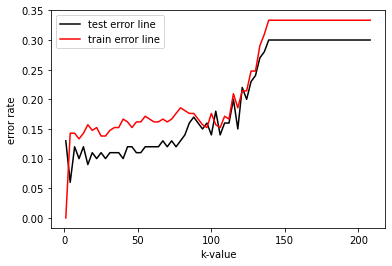

In [173]:
#Plot train and test errors 
k=np.arange(1, 209, 3)
plt.plot(k, test_error_list, c ="black", label='test error line')
plt.plot(k, train_error_list, c ="red", label='train error line')
 
plt.xlabel("k-value")
plt.ylabel("error rate")
plt.legend()

In [174]:
#Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.
neigh = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
neigh.fit(x_train, y_train)
pre=neigh.predict(x_test)
confusion=confusion_matrix(y_test, pre)
confusion_df = pd.DataFrame(confusion, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
tn,fp,fn,tp=confusion[0][0],confusion[0][1],confusion[1][0],confusion[1][1]
tpr=tp / (tp + fn)
tnr = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print('confusion matrix: ')
print(confusion_df)
print('true positive rate= '+str(tpr))
print('true negative rate= '+str(tnr))
print('F1-score= '+str(f1_score))

confusion matrix: 
                 Predicted Negative  Predicted Positive
Actual Negative                  25                   5
Actual Positive                   1                  69
true positive rate= 0.9857142857142858
true negative rate= 0.8333333333333334
F1-score= 0.9583333333333333


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

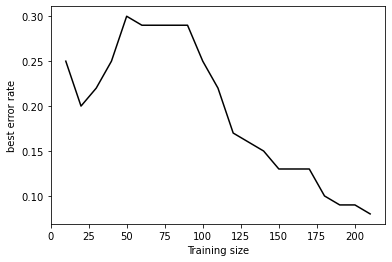

In [175]:
test_error_rate=[]
for N in range(10, 211, 10):
    train_set = pd.concat([df_train.loc[df['label'] ==0].head(N//3), df_train.loc[df['label'] ==1].head(N-N//3)])
    x_train_set=train_set.iloc[:,:6]
    y_train_set=train_set.iloc[:,6:]
    min_error=1.00
    for k in range(1, N, 5):
        neigh = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        neigh.fit(x_train_set, y_train_set)
        pre=neigh.predict(x_test)
        test_error = 1 - accuracy_score(y_test, pre)
        if test_error < min_error:
            min_error = test_error
    test_error_rate.append(min_error)
    
N=np.arange(10, 211, 10)
plt.plot(N, test_error_rate, c ="black")
 
plt.xlabel("Training size")
plt.ylabel("best error rate")
plt.show()

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

C. which becomes Chebyshev Distance with p → ∞

In [176]:
# i(A) Minkowski Distance: which becomes Manhattan Distance with p = 1.
metric=[]
min_error_set=[]
k_set=[]
min_error=1.00
for k in range(1, 200, 5):
    neigh = KNeighborsClassifier(n_neighbors = k, p=1,metric='manhattan')
    neigh.fit(x_train, y_train)
    pre=neigh.predict(x_test)
    test_error = 1 - accuracy_score(y_test, pre)
    if test_error < min_error:
        min_error = test_error
        best_k = k
metric.append('manhattan')
min_error_set.append(min_error)
k_set.append(best_k)
print('The best k equals to '+str(best_k)+', which has the minimum test error rate: '+str(min_error))

The best k equals to 6, which has the minimum test error rate: 0.10999999999999999


In [177]:
# i(B) found best log10(p)
for p in np.logspace(0.1, 1, 10):
    neigh = KNeighborsClassifier(n_neighbors=6, p=p, metric="minkowski")
    neigh.fit(x_train, y_train)
    pre=neigh.predict(x_test)
    test_error = 1 - accuracy_score(y_test, pre)
    if test_error < min_error:
        min_error = test_error
        best_p = p
metric.append('minkowski')
min_error_set.append(min_error)
k_set.append(6)
print('The best log(p) equals to '+str(math.log(best_p,10))+', which has the minimum test error rate: '+str(min_error))

The best log(p) equals to 0.6, which has the minimum test error rate: 0.06000000000000005


In [178]:
# i(c) Chebyshev Distance with p → ∞
min_error=1.00
for k in range(1, 200, 5):
    neigh = KNeighborsClassifier(n_neighbors = k, p=1,metric='chebyshev')
    neigh.fit(x_train, y_train)
    pre=neigh.predict(x_test)
    test_error = 1 - accuracy_score(y_test, pre)
    if test_error < min_error:
        min_error = test_error
        best_k = k
metric.append('chebyshev')
min_error_set.append(min_error)
k_set.append(best_k)
print('The best k equals to '+str(best_k)+', which has the minimum test error rate: '+str(min_error))

The best k equals to 16, which has the minimum test error rate: 0.07999999999999996


ii. Mahalanobis Distance.

In [179]:
min_error=1.00
options = {"VI": np.linalg.pinv(np.cov(x_train, rowvar=False))}
for k in range(1, 200, 5):
    neigh = KNeighborsClassifier(n_neighbors = k, p=2,metric='mahalanobis',metric_params=options)
    neigh.fit(x_train, y_train)
    pre=neigh.predict(x_test)
    test_error = 1 - accuracy_score(y_test, pre)
    if test_error <= min_error:
        min_error = test_error
        best_k = k
metric.append('mahalanobis')
min_error_set.append(min_error)
k_set.append(best_k)
print('The best k equals to '+str(best_k)+', which has the minimum test error rate: '+str(min_error))

The best k equals to 6, which has the minimum test error rate: 0.17000000000000004


In [180]:
# summary
result = pd.DataFrame({'metric': metric, 'k-value': k_set, 'minimum error': min_error_set})
result

,metric,k-value,minimum error
0,manhattan,6,0.11
1,minkowski,6,0.06
2,chebyshev,16,0.08
3,mahalanobis,6,0.17



(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


In [181]:
metric_list=[]
min_error_set=[]
k_set=[]
metric_name = ["euclidean", "manhattan", "chebyshev"]
for metric in metric_name:
    min_error=1.00
    for k in range(1, 200, 5):
        neigh = KNeighborsClassifier(n_neighbors = k, p=1,metric=metric,weights='distance')
        neigh.fit(x_train, y_train)
        pre=neigh.predict(x_test)
        test_error = 1 - accuracy_score(y_test, pre)
        if test_error < min_error:
            min_error = test_error
            best_k = k
    metric_list.append(metric)
    min_error_set.append(min_error)
    k_set.append(best_k)
result_weighted = pd.DataFrame({'metric': metric_list, 'k-value': k_set, 'minimum error': min_error_set})
result_weighted

,metric,k-value,minimum error
0,euclidean,6,0.10
1,manhattan,26,0.10
2,chebyshev,16,0.11


(f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate I achieved in this hw is 0.06